## **Data Storytelling - What A Waste Global Database**

By 2050, it is anticipated that global waste production will rise to 3.40 billion tons annually, a significant increase from the current 2.01 billion tons. The report "What a Waste 2.0: A Global Snapshot of Solid Waste Management to 2050" compiles extensive data on solid waste at both national and urban levels. It forecasts waste generation up to 2030 and 2050. In addition to the core metrics from waste generation to disposal, the report covers various aspects such as waste management costs, revenues, and tariffs, special waste categories, regulations, public communication, administrative and operational models, and the role of the informal sector.

The What A Waste Global Database, initiated by the World Bank, aims to document solid waste management practices across various countries.
The data was first published in 2018, and the original source can be accessed here: https://datacatalog.worldbank.org/dataset/what-waste-global-database

In [19]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import folium
import json

In [20]:
# Loading the data
df = pd.read_csv('country_level_data.csv')
df.head()

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
0,ABW,LCN,Aruba,HIC,35563.312500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.0,NaN,89.0,NaN,NaN
1,AFG,SAS,Afghanistan,LIC,2057.062256,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
2,AGO,SSF,Angola,LMC,8036.690430,51.8,6.7,4.4,11.50,11.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,ECS,Albania,UMC,13724.058590,51.4,4.5,4.8,15.21,9.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some disposal sites
4,AND,ECS,Andorra,HIC,43711.800780,31.2,8.2,2.6,11.60,35.1,...,NaN,52.1,NaN,NaN,NaN,NaN,NaN,47.9,NaN,NaN


In [21]:
# Determing the total amount of entries in the dataset
total_entries = df.shape[0]
print(total_entries)

217


In [22]:
# Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 51 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   iso3c                                                                                  217 non-null    object 
 1   region_id                                                                              217 non-null    object 
 2   country_name                                                                           216 non-null    object 
 3   income_id                                                                              217 non-null    object 
 4   gdp                                                                                    216 non-null    float64
 5   composition_food_organic_waste_percent                                        

In [23]:
# Checking for missing values
df.isnull().sum()

iso3c                                                                                      0
region_id                                                                                  0
country_name                                                                               1
income_id                                                                                  0
gdp                                                                                        1
composition_food_organic_waste_percent                                                    41
composition_glass_percent                                                                 46
composition_metal_percent                                                                 46
composition_other_percent                                                                 42
composition_paper_cardboard_percent                                                       41
composition_plastic_percent                                           

**1) Global Picture of Waste Production**

In [24]:
# Calculating the total amount of waste produced by the world annually
ttl_waste = (df['total_msw_total_msw_generated_tons_year'].sum()//1000000).astype(int)
ttl_waste = ttl_waste.astype(str) + ' mil tons'

# Displaying the total amount of waste generated by the world annually
print(f'The world produces {ttl_waste} of waste per year')

The world produces 2073 mil tons of waste per year


In [25]:
# Calculating the average amount of waste produced per capita annually
df['avg_waste_per_capita'] = df['total_msw_total_msw_generated_tons_year']/df['population_population_number_of_people']
wastepercapita = "{:.2f}".format(df['avg_waste_per_capita'].mean()) + ' tons'

# Displaying the average amount of waste produced per capita annually
print(f'The average amount of waste produced per capita annually is {wastepercapita}')

The average amount of waste produced per capita annually is 0.38 tons


Text(0.5, 1.0, 'Top 10 Countries with the Highest Waste per Capita')

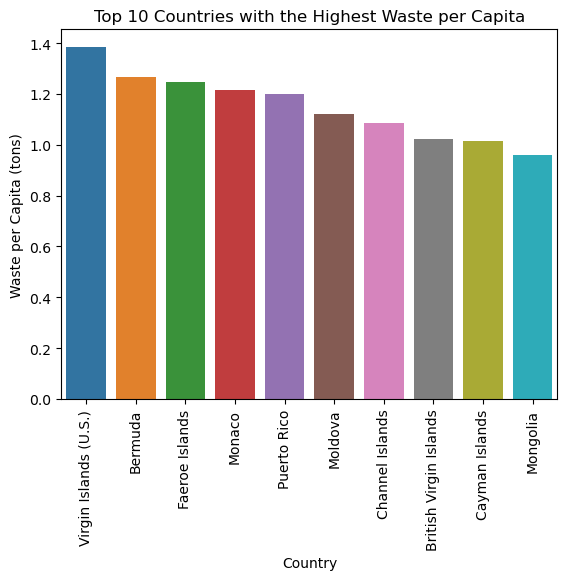

In [26]:
# Displaying the top 10 countries with the highest average waste produced per capita
top_10_waste_per_capita = df[['country_name', 'avg_waste_per_capita']].sort_values(by='avg_waste_per_capita', ascending=False).head(10)
sns.barplot(x='country_name', y='avg_waste_per_capita', data=top_10_waste_per_capita)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Waste per Capita (tons)')
plt.title('Top 10 Countries with the Highest Waste per Capita')

Text(0.5, 1.0, 'Top 10 Waste Producing Countries')

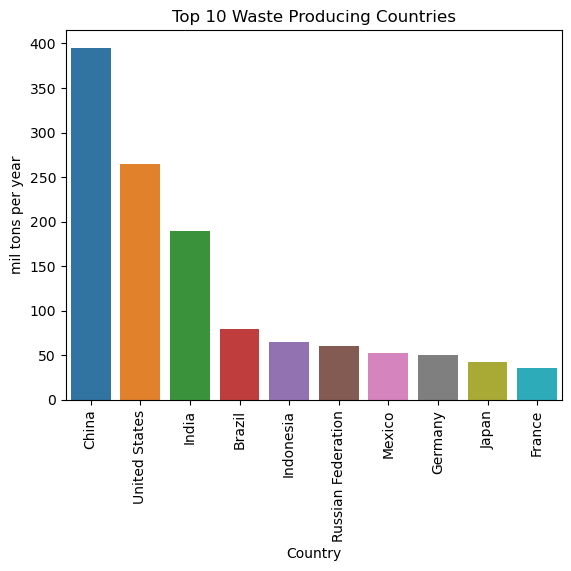

In [27]:
# Displaying countries producing the most waste per capita
df['mil tons per year'] = df['total_msw_total_msw_generated_tons_year']//1000000
top_10_waste = df[['country_name', 'mil tons per year']].sort_values(by='mil tons per year', ascending=False).head(10)
sns.barplot(x='country_name', y='mil tons per year', data=top_10_waste)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.title('Top 10 Waste Producing Countries')

In [28]:
# Loading the world map
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

In [29]:
# Performing cleanup on the categorical names of the countries for consistency
df.replace('United States', 'United States of America', inplace = True)
df.replace('Russian Federation', 'Russia', inplace = True)
df.replace('Egypt, Arab Rep.', 'Egypt', inplace = True)
df.replace('Iran, Islamic Rep.', 'Iran', inplace = True)
df.replace('Congo, Dem. Rep.', 'Democratic Republic of the Congo', inplace = True)
df.replace('Venezuela, RB', 'Venezuela', inplace = True)
df.replace('Tanzania', 'United Republic of Tanzania', inplace = True)

In [30]:
# Creating a Folium map to visualize the data
map = folium.Map(location=[39.38, 8.22], zoom_start=1)
folium.Choropleth(
    # The GeoJSON data to represent the world country
    geo_data=country_shapes,
    name='The World Map of Solid Waste',
    data=df,
    # The column aceppting list with 2 value; The country name and the numerical value
    columns=['country_name', 'mil tons per year'],
    key_on='feature.properties.name',
    fill_color='RdYlBu_r',
    nan_fill_color='grey'
    ).add_to(map)
map

Text(0.5, 1.0, 'Percentage of Countries with Waste Mgt Laws')

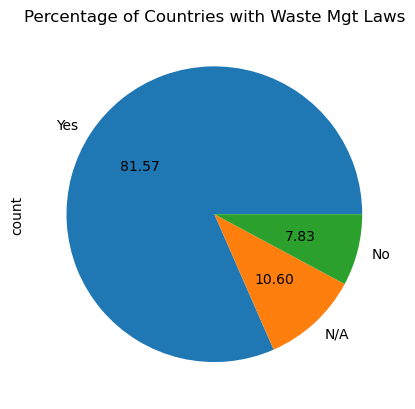

In [31]:
# Displaying the percentage of coutries with waste management laws

df.rename(columns={'other_information_national_law_governing_solid_waste_management_in_the_country': 'waste mgt law'}, inplace=True)
df['waste mgt law'].replace({np.nan: 'N/A', 'yes': 'Yes'}, inplace=True)
df['waste mgt law'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Percentage of Countries with Waste Mgt Laws')

Text(60.70600964506171, 0.5, 'GDP')

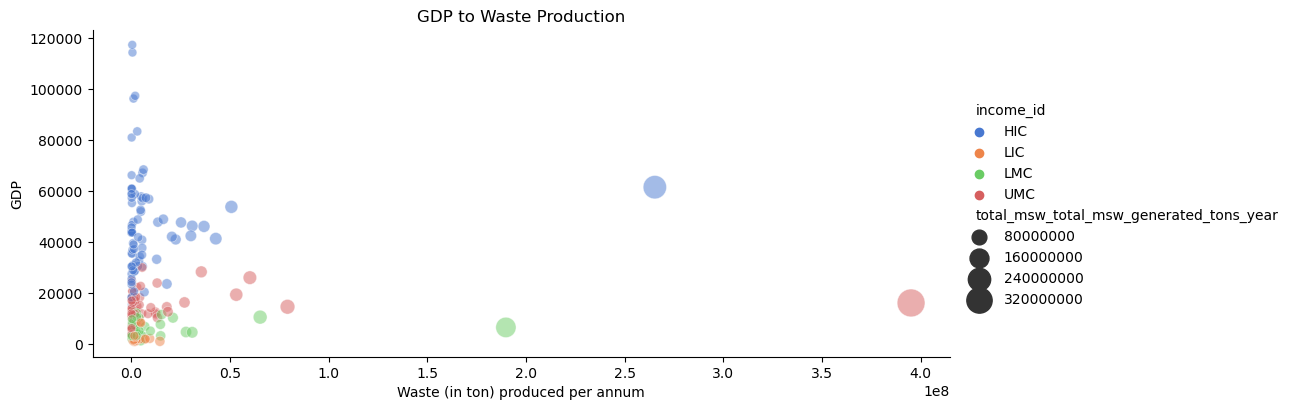

In [32]:
# Creating Seaborn plot to display relationship between GDP and waste production

sns.relplot(x="total_msw_total_msw_generated_tons_year", y="gdp", hue="income_id", size="total_msw_total_msw_generated_tons_year",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=4, aspect=2.5, data=df)
plt.title('GDP to Waste Production')
plt.xlabel('Waste (in ton) produced per annum')
plt.ylabel('GDP')

Text(49.79882561728395, 0.5, 'Population')

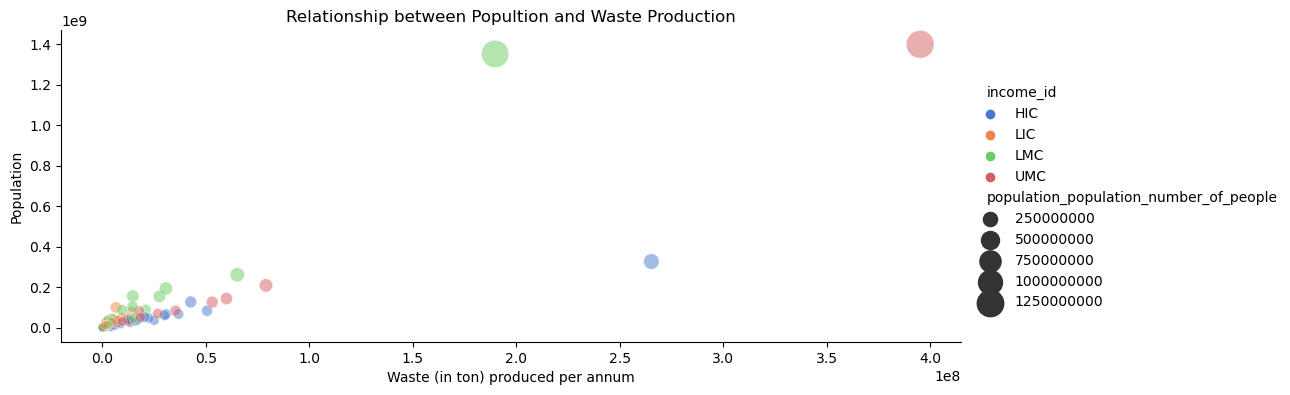

In [33]:
# Creating Seaborn plot to display relationship between population and waste production

sns.relplot(x="total_msw_total_msw_generated_tons_year", y="population_population_number_of_people", hue="income_id", size="population_population_number_of_people",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=4, aspect=2.5, data=df)
plt.title('Relationship between Popultion and Waste Production')
plt.xlabel('Waste (in ton) produced per annum')
plt.ylabel('Population')

**2) Waste Management & Recycling**

In [34]:
# Countries with best waste collection coverage by income id
waste_coll = df.groupby(['income_id'])['waste_collection_coverage_total_percent_of_population'].mean().round(2).reset_index()
waste_coll['income_id'].replace({'HIC': 'High Income Countries', 'LIC': 'Low Income Countries', 'LMC': 'Lower Middle-Income Countries', 'UMC': 'Upper Middle-Income Countries'}, inplace=True)
waste_c = waste_coll.sort_values(by='waste_collection_coverage_total_percent_of_population', ascending=False)
waste_c

,income_id,waste_collection_coverage_total_percent_of_population
0,High Income Countries,94.56
3,Upper Middle-Income Countries,77.94
2,Lower Middle-Income Countries,50.93
1,Low Income Countries,30.16


Text(0.5, 1.0, 'Waste Collection Coverage (by country income group)')

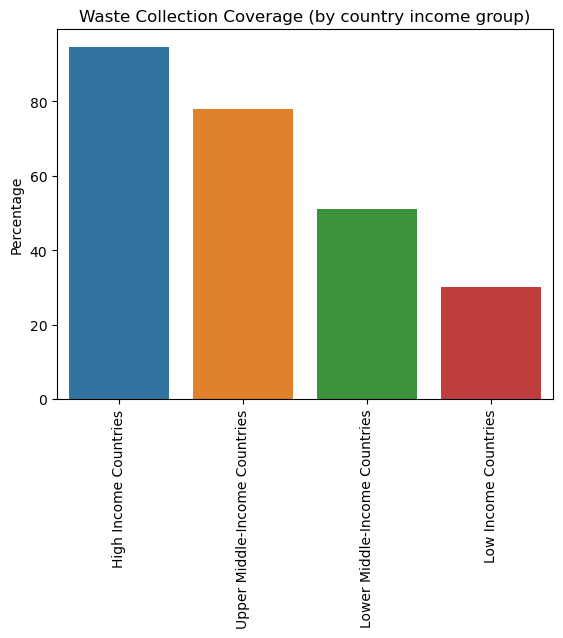

In [35]:
sns.barplot(x='income_id', y='waste_collection_coverage_total_percent_of_population', data=waste_c)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Percentage')
plt.title('Waste Collection Coverage (by country income group)')

In [38]:
# Calculating the total amount of waste recycled by the world annually
ttl_recycled = "{:.1f}".format(df['waste_treatment_recycling_percent'].mean()) + '%'
print(f'According to countries where data is available, the world recycles approximately {ttl_recycled} of waste per year')

According to countries where data is available, the world recycles approximately 17.4% of waste per year


In [39]:
#countries leading recycling efforts
top_10_recycle = df[['country_name', 'waste_treatment_recycling_percent']].sort_values(by='waste_treatment_recycling_percent', ascending=False).head(10)
top_10_recycle

,country_name,waste_treatment_recycling_percent
65,Faeroe Islands,67.00
112,Liechtenstein,64.60
169,Singapore,61.00
105,"Korea, Rep.",58.00
93,Iceland,55.81
88,Isle of Man,50.00
50,Germany,47.83
180,Slovenia,46.44
173,San Marino,45.05
10,Australia,42.10


In [40]:
#recycling efforts in accordance to country income id
recycle_income_id = df.groupby(['income_id'])['waste_treatment_recycling_percent'].mean().round(2).reset_index()
recycle_income_id['income_id'].replace({'HIC': 'High Income Countries', 'LIC': 'Low Income Countries', 'LMC': 'Lower Middle-Income Countries', 'UMC': 'Upper Middle-Income Countries'}, inplace=True)
recycle = recycle_income_id.sort_values(by='waste_treatment_recycling_percent', ascending=False)
recycle

,income_id,waste_treatment_recycling_percent
0,High Income Countries,25.56
2,Lower Middle-Income Countries,10.68
3,Upper Middle-Income Countries,9.67
1,Low Income Countries,7.85


Text(0.5, 1.0, 'Proportion of Recycling (by country income group)')

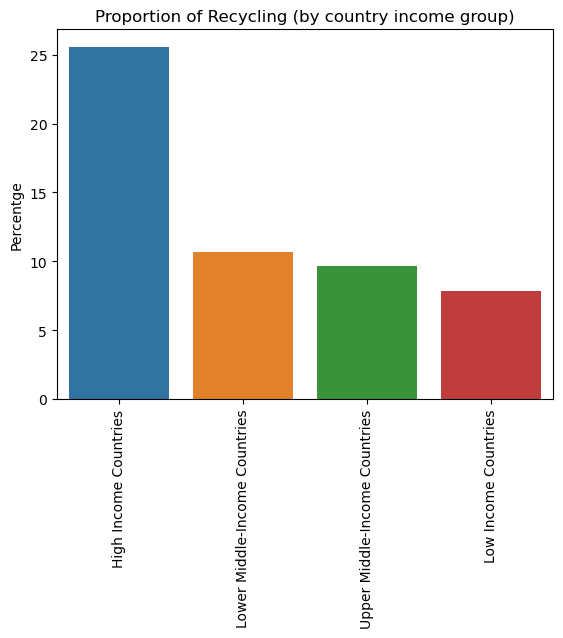

In [41]:
sns.barplot(x='income_id', y='waste_treatment_recycling_percent', data=recycle)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Percentge')
plt.title('Proportion of Recycling (by country income group)')

In [42]:
# countries still having a high portion of open dump, which is environmentally harmful
df[['country_name', 'waste_treatment_open_dump_percent']].sort_values(by='waste_treatment_open_dump_percent', ascending=False).head(10)

,country_name,waste_treatment_open_dump_percent
106,Kuwait,100.0
7,Armenia,100.0
12,Azerbaijan,100.0
92,Iraq,100.0
101,Kyrgyz Republic,100.0
190,Tajikistan,100.0
134,Mozambique,99.0
123,Madagascar,96.7
188,Togo,96.2
164,Russia,95.0


Text(0.5, 1.0, 'Proportion of Waste Management by Open Dump (by country income group)')

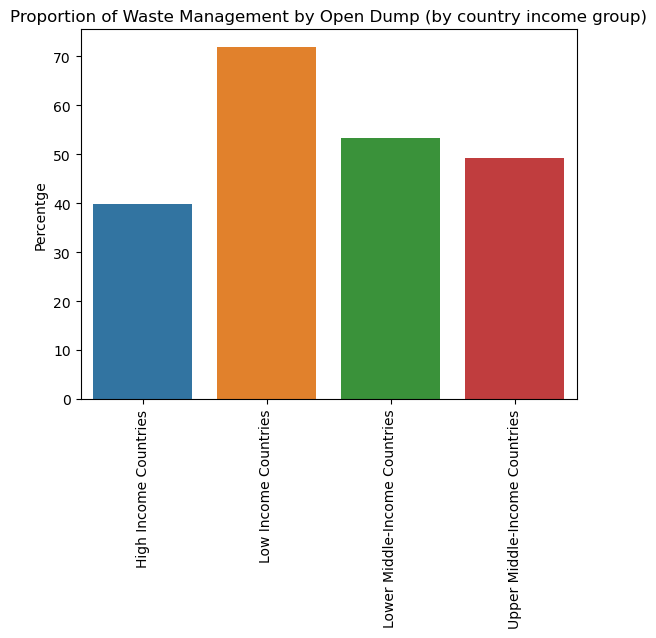

In [43]:
# countries with worst waste management - open dump by income id
opendump = df.groupby(['income_id'])['waste_treatment_open_dump_percent'].mean().round(2).reset_index()
opendump['income_id'].replace({'HIC': 'High Income Countries', 'LIC': 'Low Income Countries', 'LMC': 'Lower Middle-Income Countries', 'UMC': 'Upper Middle-Income Countries'}, inplace=True)
#opendump.sort_values(by='waste_treatment_open_dump_percent', ascending=False)
sns.barplot(x='income_id', y='waste_treatment_open_dump_percent', data=opendump)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Percentge')
plt.title('Proportion of Waste Management by Open Dump (by country income group)')

In [44]:
map = folium.Map(location=[39.38, 8.22], zoom_start=2)
folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=country_shapes,
    name='Locations where Open Dump is still Adopted for Waste Management',
    data=df,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['country_name', 'waste_treatment_open_dump_percent'],
    key_on='feature.properties.name',
    fill_color='RdYlBu_r',
    nan_fill_color='grey'
    ).add_to(map)
map

<Axes: >

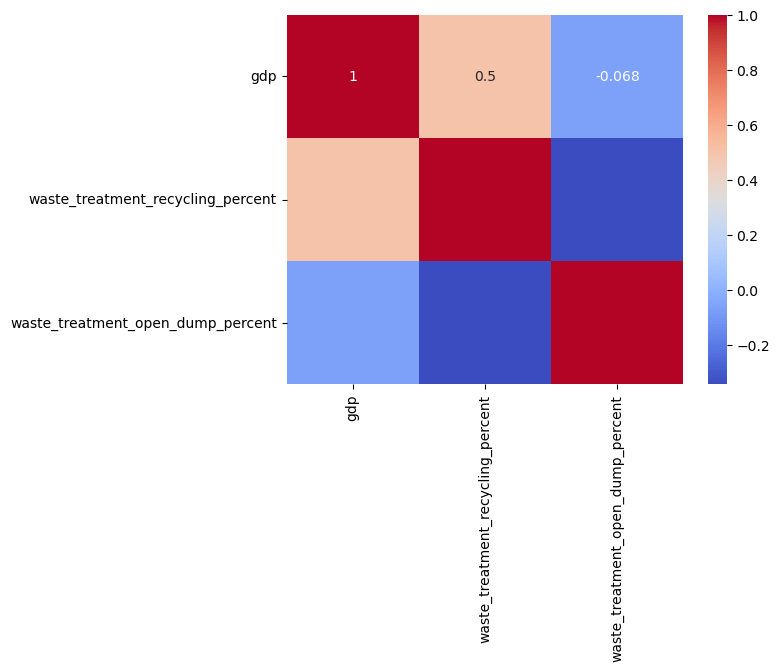

In [45]:
# is waste management methods gdp dependent
corr_map = df[['gdp', 'waste_treatment_recycling_percent', 'waste_treatment_open_dump_percent']]
corr_matrix = corr_map.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')